32. Two .csv data files (file A, file B) have time information and one addiotional parameter (Temperature and Value).  Read the data, pay attention to format. Then carry out the following tasks:  

a) Convert time information of both data frames to Pandas datetime format   
b) Merge two frames according to time   
c) Compare different merging methods (inner, outer, left, right), are the results different?    
d) In which cases you would use one of four merging methods?    
e) Add column which includes Unix epoch time    
f) Calculate daily average, minimum and maximum of Value and Temperature by grouping    
g) Draw a graph of where you show hourly and daily temperature versus time. Use matplotlib and/or Streamlit.    

In [59]:
import pandas as pd
dfA = pd.read_csv('./data/data_A.csv')
display(dfA.head(3))
dfB = pd.read_csv('./data/data_B.csv',delimiter = ";")
display(dfB.head(3))
dfA.info()

,Time,Value
0,01-01-2021 20:00:00,2.658974
1,01-01-2021 21:00:00,3.040251
2,01-01-2021 22:00:00,4.260817


,Time,Temperature
0,1.1.2021 0:00,-0.9
1,1.1.2021 1:00,-1.3
2,1.1.2021 2:00,-1.4


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    130 non-null    object 
 1   Value   130 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.2+ KB


In [60]:
#a) Convert time information of both data frames to Pandas datetime format
dfA['datetime'] = pd.to_datetime(dfA['Time'],format = '%d-%m-%Y %H:%M:%S')
display(dfA.tail(2))
dfB['datetime'] = pd.to_datetime(dfB['Time'],format = '%d.%m.%Y %H:%M')
display(dfB.tail(2))

,Time,Value,datetime
128,07-01-2021 04:00:00,3.554273,2021-01-07 04:00:00
129,07-01-2021 05:00:00,4.071457,2021-01-07 05:00:00


,Time,Temperature,datetime
128,6.1.2021 8:00,-12.5,2021-01-06 08:00:00
129,6.1.2021 9:00,-11.4,2021-01-06 09:00:00


In [61]:
#b) Merge two frames according to time
#c) Compare different merging methods (inner, outer, left, right), are the results different?
#Note that dfA starts at 2021-01-01 20:00:00 but dfB at 2021-01-01 00:00:00
#dfA ends at 2021-01-07 05:00:00 and dfB ends at 2021-01-06 09:00:00

#df =  pd.merge(dfA,dfB, on = 'datetime', how = 'inner') #Excludes the rows where the same datetime value is
#not found in both data. If some hour of data appears onle in A or B, it will be dropped in inner join

df =  pd.merge(dfA,dfB, on = 'datetime', how = 'outer') #keeps all the rows, but uses NaN when datetime value
#doesn't appear in either of data sets

#df =  pd.merge(dfA,dfB, on = 'datetime', how = 'left') #All datetime values from dfA (left side) are included 

#df =  pd.merge(dfA,dfB, on = 'datetime', how = 'right') #All datetime values from dfB (right side) are included

#Inner, outer, left and right join give different outputs beause datetime values of dfA and dfB are different

df = df[['datetime','Value','Temperature']]
df

,datetime,Value,Temperature
0,2021-01-01 00:00:00,NaN,-0.9
1,2021-01-01 01:00:00,NaN,-1.3
2,2021-01-01 02:00:00,NaN,-1.4
3,2021-01-01 03:00:00,NaN,-1.9
4,2021-01-01 04:00:00,NaN,-1.9
...,...,...,...
145,2021-01-07 01:00:00,6.686486,NaN
146,2021-01-07 02:00:00,5.617932,NaN
147,2021-01-07 03:00:00,6.287180,NaN
148,2021-01-07 04:00:00,3.554273,NaN


In [62]:
#d) In which cases you would use one of four merging methods?

#Outer: "Maximum data coverage", usefull if you like to keep the row even if Value or Temperature doesn't exist
#Example: Collecting a data set without knowing how it wil be used

#Right: If the right dataframe contains information mandatory for the analysis
#Left: If the right dataframe contains information mandatory for the analysis

#Inner: "Safe choice" if you are not sure how left and right would work


In [63]:
#e) Add column which includes Unix epoch time
df['unix_epoch [s]'] = (df['datetime'].astype('int64')/10**9).astype('int64')
df

,datetime,Value,Temperature,unix_epoch [s]
0,2021-01-01 00:00:00,NaN,-0.9,1609459200
1,2021-01-01 01:00:00,NaN,-1.3,1609462800
2,2021-01-01 02:00:00,NaN,-1.4,1609466400
3,2021-01-01 03:00:00,NaN,-1.9,1609470000
4,2021-01-01 04:00:00,NaN,-1.9,1609473600
...,...,...,...,...
145,2021-01-07 01:00:00,6.686486,NaN,1609981200
146,2021-01-07 02:00:00,5.617932,NaN,1609984800
147,2021-01-07 03:00:00,6.287180,NaN,1609988400
148,2021-01-07 04:00:00,3.554273,NaN,1609992000


In [64]:
#f) Calculate daily average, minimum and maximum of Value and Temperature by grouping
#freq = 'd', daily
#freq = '5d', five days
#freq = 'W', week
df_avg = df.groupby(pd.Grouper(key = 'datetime', freq = 'd'))[['Value','Temperature']].mean().reset_index()
df_min = df.groupby(pd.Grouper(key = 'datetime', freq = 'd'))[['Value','Temperature']].min().reset_index()
df_max = df.groupby(pd.Grouper(key = 'datetime', freq = 'd'))[['Value','Temperature']].max().reset_index()
df_max


,datetime,Value,Temperature
0,2021-01-01,4.260817,-0.9
1,2021-01-02,8.201273,-4.2
2,2021-01-03,5.162632,-6.6
3,2021-01-04,8.350686,-15.2
4,2021-01-05,9.256288,-11.2
5,2021-01-06,7.822700,-10.5
6,2021-01-07,6.686486,NaN


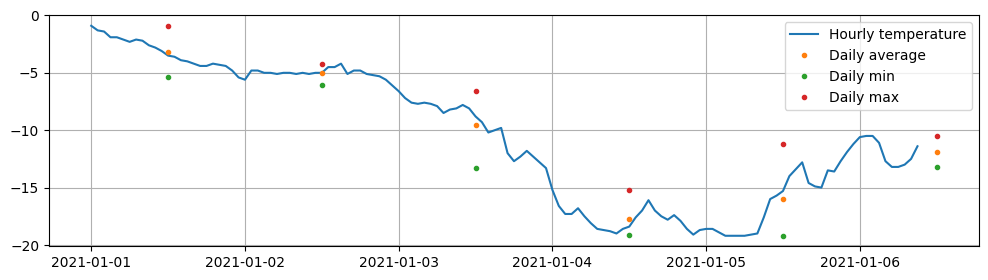

In [65]:
#g) Draw a graph of where you show hourly and daily temperature versus time. Use matplotlib and/or Streamlit. 
import matplotlib.pyplot as plt
plt.figure(figsize=(12,3))
plt.plot(df['datetime'],df['Temperature'], label = 'Hourly temperature')
plt.plot(df_avg['datetime'] + pd.DateOffset(hours = 12),df_avg['Temperature'],'.', label = 'Daily average')
plt.plot(df_min['datetime'] + pd.DateOffset(hours = 12),df_min['Temperature'],'.', label = 'Daily min')
plt.plot(df_max['datetime'] + pd.DateOffset(hours = 12),df_max['Temperature'],'.', label = 'Daily max')
plt.legend()
plt.grid()
plt.show()